In [1]:
import math
import statistics
import collections
import itertools
import functools
import operator
import multiprocessing

import numpy as np
import scipy as sp
import scipy.stats

import pandas as pd

from matplotlib import pyplot as plt, ticker

from IPython.display import clear_output

%load_ext snakeviz

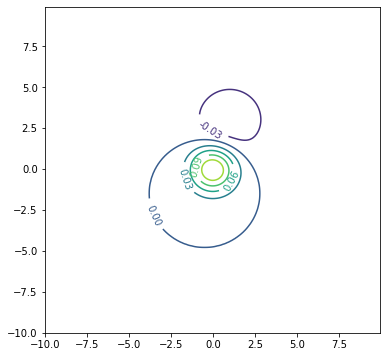

In [3]:
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.dstack((x, y))

v1 = sp.stats.multivariate_normal([0, 0])
v2 = sp.stats.multivariate_normal([1, 3], 3)


plt.figure(figsize=(6, 6))
c = plt.contour(x, y, v1.pdf(pos) - v2.pdf(pos))
plt.clabel(c, fmt=ticker.StrMethodFormatter('{x:.2f}'))
plt.show()

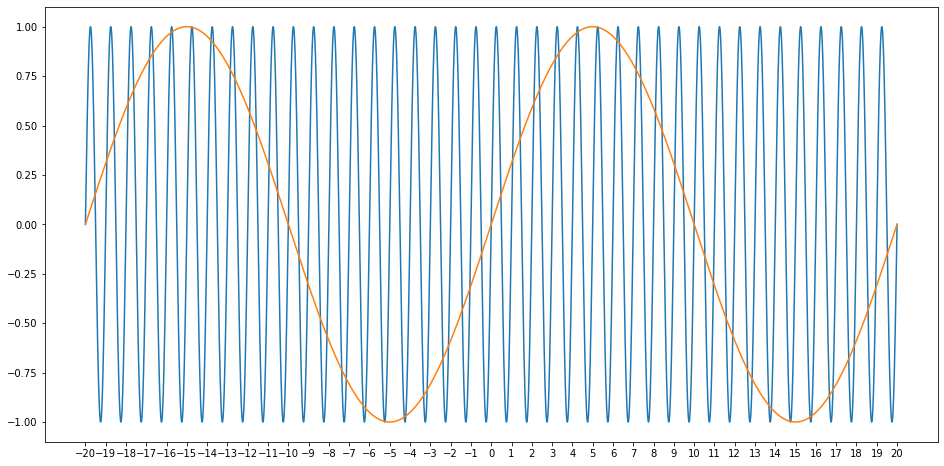

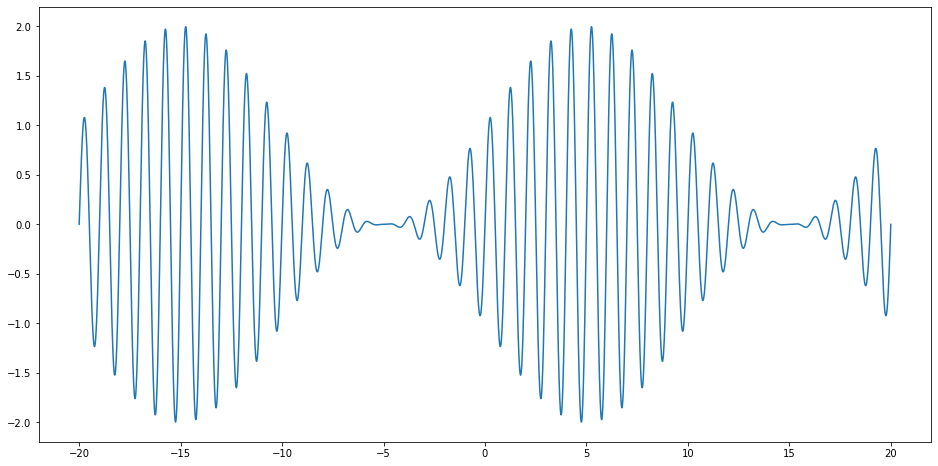

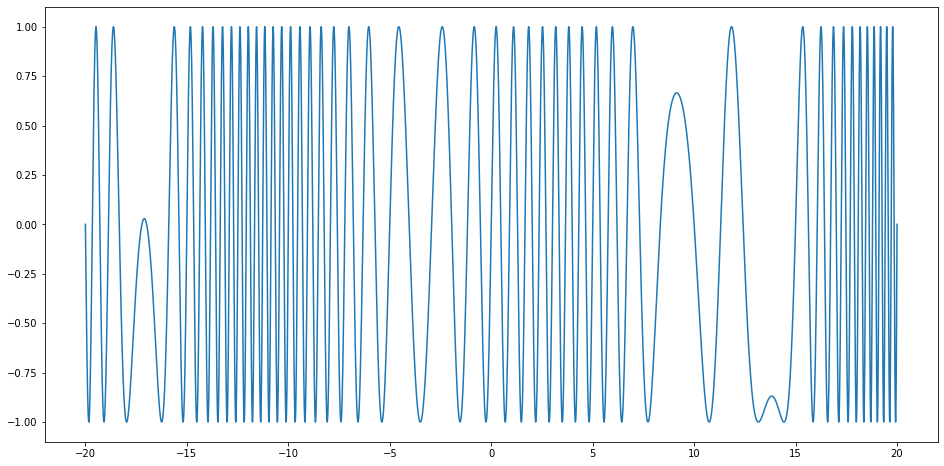

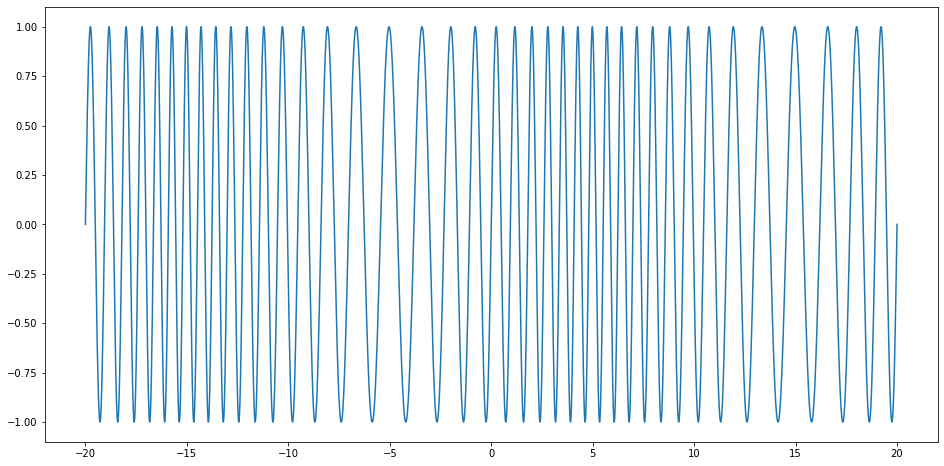

In [72]:
c = lambda x: np.sin(2 * math.pi * x * 1.0)
b = lambda x: np.sin(2 * math.pi * x * .05)
x = np.linspace(-20, 20, 10000)

plt.figure(figsize=(16, 8))
plt.plot(x, c(x))
plt.plot(x, b(x))
plt.xticks(np.arange(-20, 21, 1))

am = lambda x: c(x) * (1 + b(x))
plt.figure(figsize=(16, 8))
plt.plot(x, am(x))

fm_naive = lambda x: np.sin(2 * math.pi * x * (1.0 + .4 * b(x)))
plt.figure(figsize=(16, 8))
plt.plot(x, fm_naive(x))

@np.vectorize
def bmean(tau):
    x_tau = x[x <= tau]
    return 1 / tau * np.trapz(b(x_tau), x_tau)

fm = lambda x: np.sin(2 * math.pi * x * (1.0 + .4 * bmean(x)))
plt.figure(figsize=(16, 8))
plt.plot(x, fm(x))

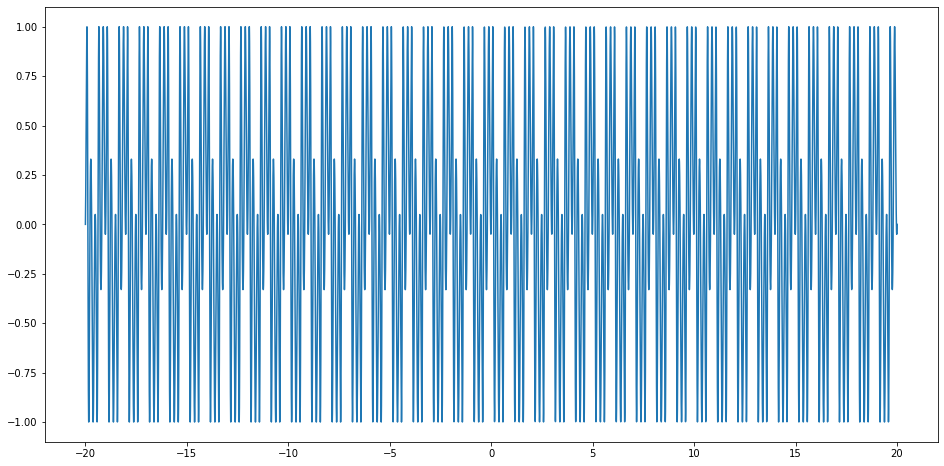

In [80]:
b = lambda x: np.sin(2 * math.pi * x * 2.0)
fm = lambda x: np.sin(2 * math.pi * x * (1.0 + 5 * bmean(x)))
plt.figure(figsize=(16, 8))
plt.plot(x, fm(x))

In [60]:
N = 10

def c(m, n):
    def f(t):
        res = np.zeros(N)
        if m == 0:
            res[0] = t
        else:
            assert n < 2**(m - 1)
            index = 2**(m - 1) + n
            scaled_t = t * 2**(m - 1)
            if n <= scaled_t < n + 1:
                res[index] = (.5 - abs(scaled_t - n - .5)) / 2**(m - 1)
        return res
    return f

def s(m):
    def f(t):
        res = c(0, 0)(t)
        for m_ in range(1, m + 1):
            if m_ == 1: continue
            for n in range(2**(m_ - 1)):
                res += c(m_, n)(t)
        return res
    return f

np.set_printoptions(precision=4, floatmode='fixed')
for t in np.linspace(0, 1, 17):
    print('{:.4f}'.format(t), s(3)(t))

0.0000 [0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
0.0625 [0.0625 0.0000 0.0625 0.0000 0.0625 0.0000 0.0000 0.0000 0.0000 0.0000]
0.1250 [0.1250 0.0000 0.1250 0.0000 0.1250 0.0000 0.0000 0.0000 0.0000 0.0000]
0.1875 [0.1875 0.0000 0.1875 0.0000 0.0625 0.0000 0.0000 0.0000 0.0000 0.0000]
0.2500 [0.2500 0.0000 0.2500 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
0.3125 [0.3125 0.0000 0.1875 0.0000 0.0000 0.0625 0.0000 0.0000 0.0000 0.0000]
0.3750 [0.3750 0.0000 0.1250 0.0000 0.0000 0.1250 0.0000 0.0000 0.0000 0.0000]
0.4375 [0.4375 0.0000 0.0625 0.0000 0.0000 0.0625 0.0000 0.0000 0.0000 0.0000]
0.5000 [0.5000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000]
0.5625 [0.5625 0.0000 0.0000 0.0625 0.0000 0.0000 0.0625 0.0000 0.0000 0.0000]
0.6250 [0.6250 0.0000 0.0000 0.1250 0.0000 0.0000 0.1250 0.0000 0.0000 0.0000]
0.6875 [0.6875 0.0000 0.0000 0.1875 0.0000 0.0000 0.0625 0.0000 0.0000 0.0000]
0.7500 [0.7500 0.0000 0.0000 0.2500 0.0000 0.0000 0.

In [61]:
s(3)(.25) - s(3)(0), s(3)(1) - s(3)(.25)

(array([0.2500, 0.0000, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000]),
 array([ 0.7500,  0.0000, -0.2500,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000]))